In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## 1 Load CIFAR-10 Dataset

Consisting of 60,000 color images from 10 classes -- 50,000 training images and 10,000 test images

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 17s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Display sample images from data

Should always inspect some images from a dataset, these are relatively small (32x32) but contain enough information for classification

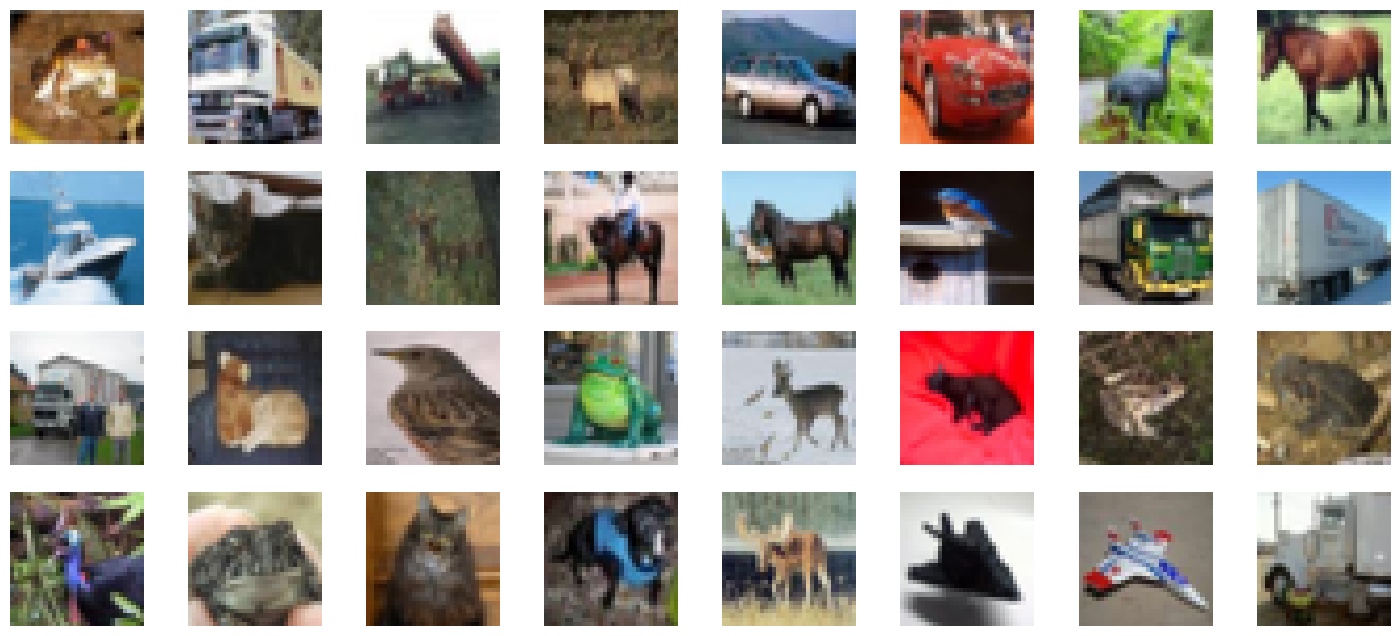

In [4]:
plt.figure(figsize=(18,8))

num_rows = 4
num_cols = 8

for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

## 2 Dataset Preprocessing

Normalize the image data to range [0,1] and convert integer labels to one-hot encoded labels

In [6]:
X_train = X_train.astype("float32") / 255 
X_test = X_test.astype("float32") / 255 

print("Original (integer) label for the first training sample: ", y_train[0])

# Convert labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("AFter conversion to categorical one-hot encoded labels: ", y_train[0])

Original (integer) label for the first training sample:  [6]
AFter conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 3 Dataset and Training Configuration Parameters

This provides us a single place to go to make any desired changes

In [7]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 31
    BATCH_SIZE: int = 256
    LEARNING_RATE: float = 0.001

## 4 CNN Model Implementation in Keras

Steps to define and train a model in Keras

1. Build and define a network model using predefined layers in Keras
2. Compile the model with model.compile()
3. Train the model with model.fit()

### Model Structure

In [8]:
def cnn_model(input_shape=(32,32,3)):

    model = Sequential()

    #---------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #---------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #---------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #---------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #---------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #---------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #---------------------------------------
    # Flatten the convolutional features
    #---------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model
    

### Define the classifer

First flatten the activation maps from the last convolutional layer
Softmax function normalizes outputs from [0,1] 

### Create the Model

In [9]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

### Compile the model

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

### Train the model

In [11]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3)

Epoch 1/31
137/137 [==============================] - 56s 404ms/step - loss: 2.1108 - accuracy: 0.2316 - val_loss: 1.7648 - val_accuracy: 0.3591
Epoch 2/31
137/137 [==============================] - 54s 392ms/step - loss: 1.7088 - accuracy: 0.3826 - val_loss: 1.5511 - val_accuracy: 0.4319
Epoch 3/31
137/137 [==============================] - 50s 367ms/step - loss: 1.4976 - accuracy: 0.4570 - val_loss: 1.4205 - val_accuracy: 0.4901
Epoch 4/31
137/137 [==============================] - 51s 375ms/step - loss: 1.3473 - accuracy: 0.5185 - val_loss: 1.4195 - val_accuracy: 0.4970
Epoch 5/31
137/137 [==============================] - 51s 373ms/step - loss: 1.2172 - accuracy: 0.5668 - val_loss: 1.4945 - val_accuracy: 0.4989
Epoch 6/31
137/137 [==============================] - 54s 396ms/step - loss: 1.1018 - accuracy: 0.6066 - val_loss: 1.0995 - val_accuracy: 0.6102
Epoch 7/31
137/137 [==============================] - 54s 394ms/step - loss: 0.9828 - accuracy: 0.6508 - val_loss: 0.9969 - val_ac

### Plot the training results

In [12]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

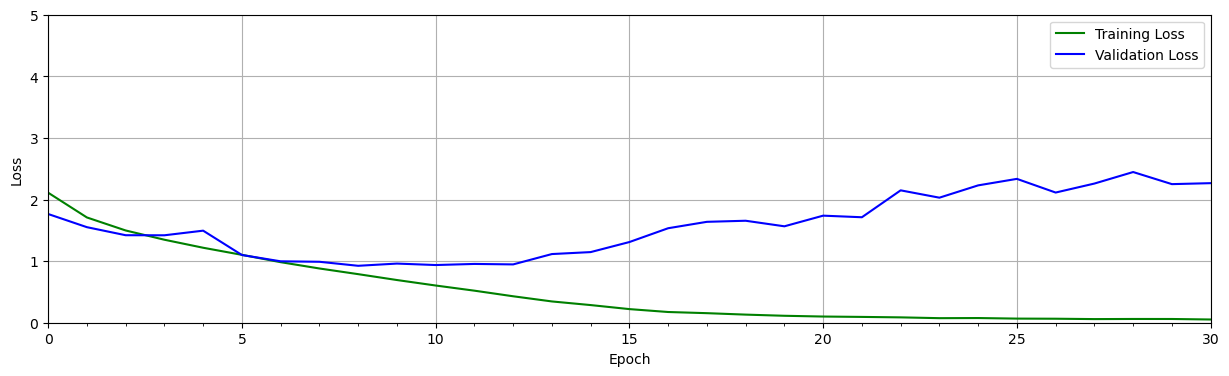

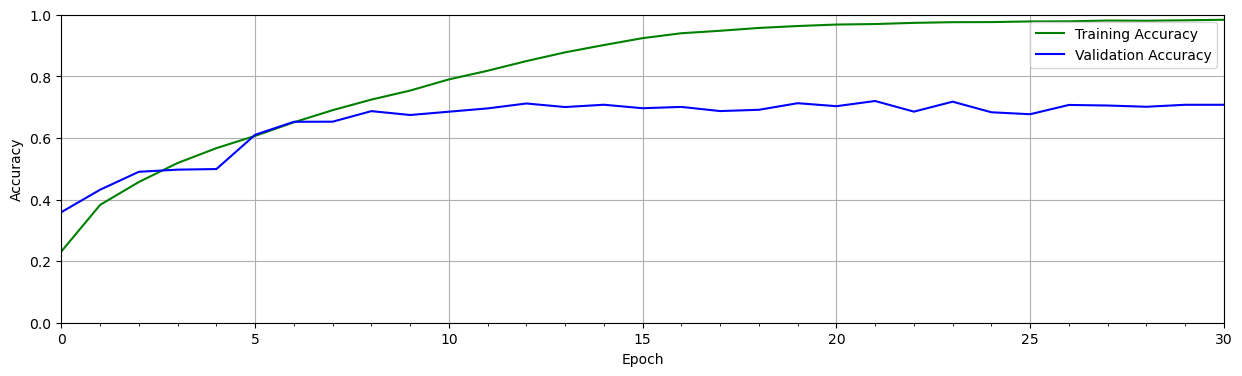

In [13]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

These results show that our model is overfitting, we lose validation accuracy around 10 epochs.

## 5 Adding `Dropout` to the model

We employ a regularization technique called dropout which helps to reduce the model's flexibility so it doesn't overfit the training data. Dropout is implemented in Keras as a special layer type that randomly drops a percentage of neurons during the training process.
When used in convolutional layers it is usually implemented after the maxpooling layer and thus elimates a percentage of neurons in the feature map.

### Define the model (with Dropout)

In [15]:
def cnn_model_dropout(input_shape=(32,32,3)):

    model = Sequential()

    #---------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #---------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    #---------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #---------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    #---------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #---------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    #---------------------------------------
    # Flatten the convolutional features
    #---------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model
    

In [16]:
# Create model
model1 = cnn_model_dropout()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [17]:
# Compile model
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [18]:
# Train the model
history1 = model1.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3)

Epoch 1/31
137/137 [==============================] - 52s 378ms/step - loss: 2.1560 - accuracy: 0.2103 - val_loss: 1.9803 - val_accuracy: 0.3048
Epoch 2/31
137/137 [==============================] - 61s 443ms/step - loss: 1.8495 - accuracy: 0.3267 - val_loss: 1.6750 - val_accuracy: 0.3805
Epoch 3/31
137/137 [==============================] - 68s 497ms/step - loss: 1.6530 - accuracy: 0.3995 - val_loss: 1.4604 - val_accuracy: 0.4668
Epoch 4/31
137/137 [==============================] - 63s 459ms/step - loss: 1.5021 - accuracy: 0.4601 - val_loss: 1.3280 - val_accuracy: 0.5145
Epoch 5/31
137/137 [==============================] - 60s 438ms/step - loss: 1.3879 - accuracy: 0.4985 - val_loss: 1.2509 - val_accuracy: 0.5471
Epoch 6/31
137/137 [==============================] - 60s 433ms/step - loss: 1.2796 - accuracy: 0.5410 - val_loss: 1.2090 - val_accuracy: 0.5623
Epoch 7/31
137/137 [==============================] - 55s 402ms/step - loss: 1.1894 - accuracy: 0.5776 - val_loss: 1.0558 - val_ac

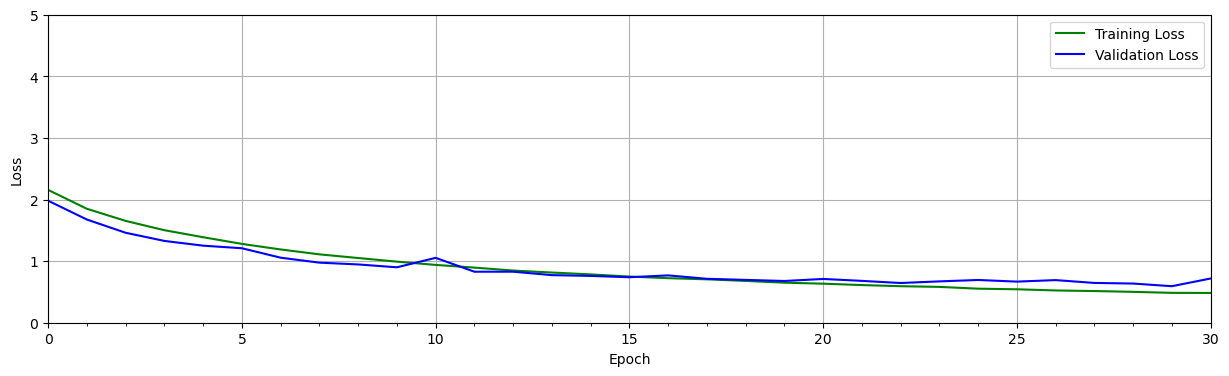

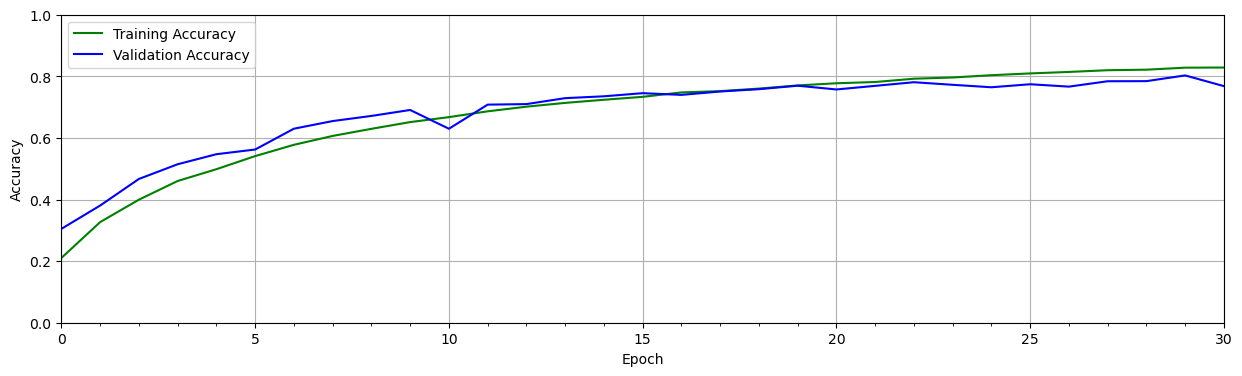

In [19]:
# Retrieve training results.
train_loss = history1.history["loss"]
train_acc  = history1.history["accuracy"]
valid_loss = history1.history["val_loss"]
valid_acc  = history1.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

## 6 Saving and Loading Models

This enables you to develop and train a model, save it to the file system and load it at some point in the future

### Saving models

The variables/ folder contains standard training checkpoint file with the weights of the model

In [20]:
# Use the save() method
model1.save('model_dropout')

INFO:tensorflow:Assets written to: model_dropout\assets


INFO:tensorflow:Assets written to: model_dropout\assets


### Loading models

In [21]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model("model_dropout")

## 7 Model Evaluation

### Approach 1: Evaluate the model on the test dataset

In [22]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 4s 13ms/step - loss: 0.7366 - accuracy: 0.7673
Test Accuracy: 76.730


### Approach 2: Make predictions on sample test images

In [23]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 [==============================] - 0s 89ms/step
Prediction accuracy:  0.88


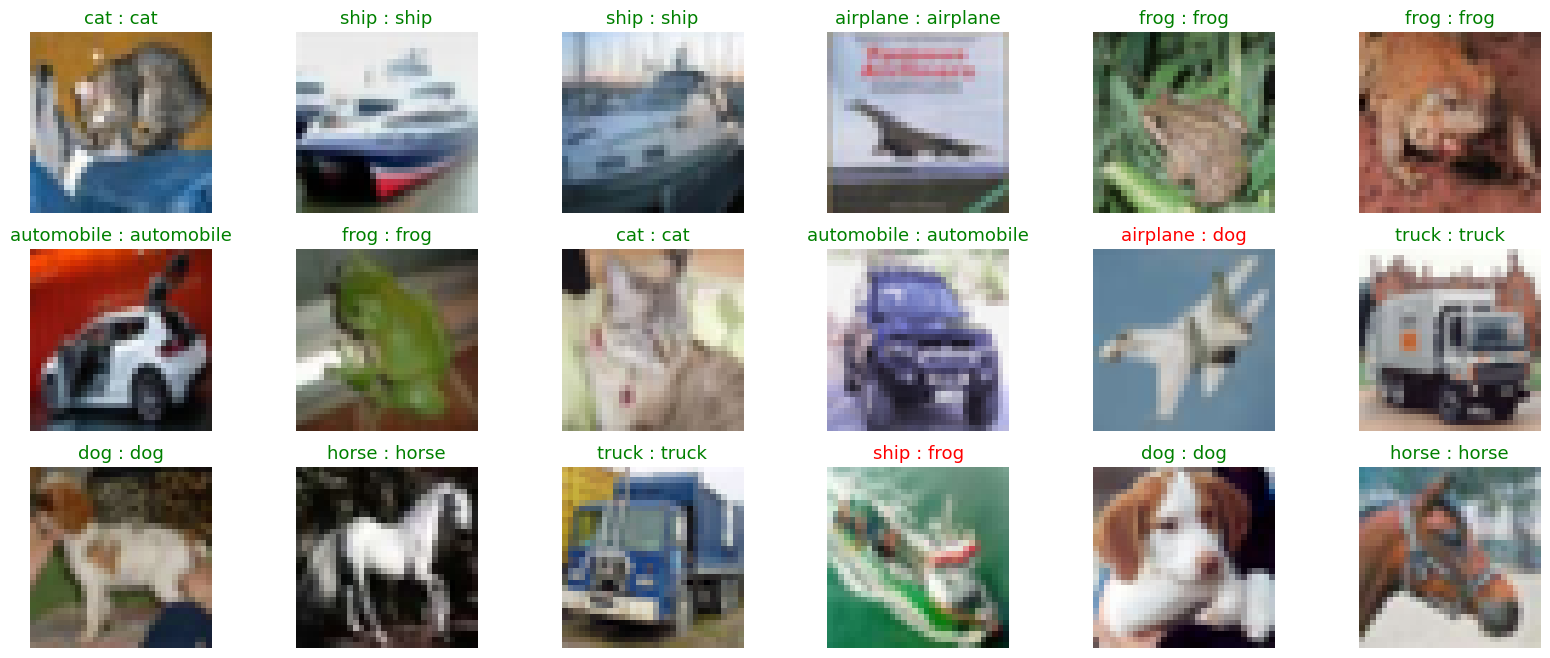

In [24]:
evaluate_model(X_test, reloaded_model_dropout)

### Approach 3: Confusion matrix

In [25]:
# Generate predictions for test dataset
predictions = reloaded_model_dropout.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 4s 13ms/step


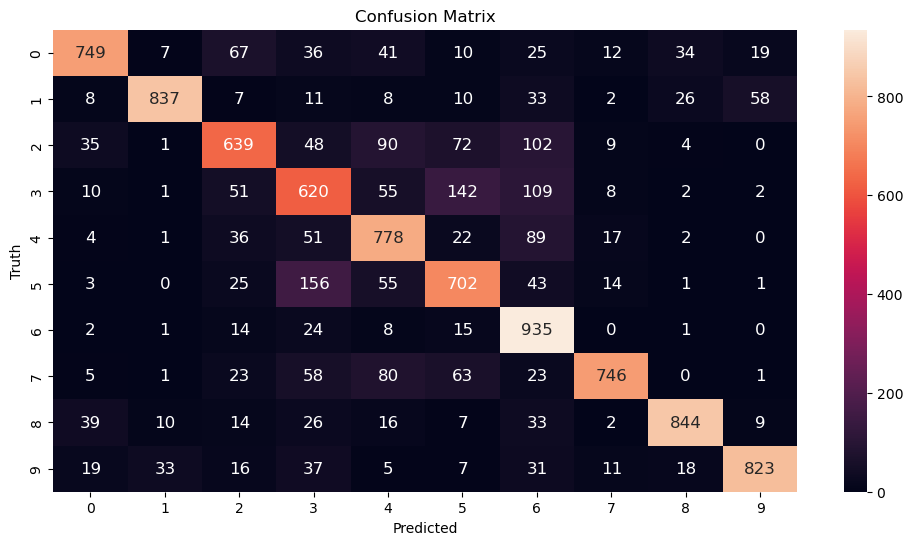

In [26]:
# Convert one-hot encoded labels to integers
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a CM
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the CM as a heatmap
plt.figure(figsize=[12,6])
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

From this CM you can tell that out of all classes dogs (5) and cats(3) get confused the most